<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_dimethylsulfide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimethylsulfid DMS (CH₃)₂S and Dimethyldisulfid DMDS (CH₃S)₂**

🌱 Warum gelten **DMS** und **DMDS** als Biosignaturen?

**Dimethylsulfid (DMS, (CH₃)₂S)**:
- Wird hauptsächlich von **phytoplanktonischen Mikroorganismen** in den Ozeanen produziert.
- Entsteht beim Abbau von **Dimethylsulfoniopropionat (DMSP)**, einer Substanz, die von marinen Algen gebildet wird.
- Hat **keine bekannte geologische oder abiotische Quelle** in signifikanten Mengen in einer erdähnlichen Atmosphäre.
- Ein detektierbarer Anteil von DMS in einer Exoplanetenatmosphäre könnte also auf **biologische Aktivität** hindeuten.

**Dimethyldisulfid (DMDS, (CH₃S)₂)**:
- Ebenfalls ein Produkt mikrobieller Aktivität, entsteht bei **Zersetzungsprozessen von organischem Material**.
- Kommt auf der Erde z. B. bei **bakteriellem Abbau von Proteinen** vor.
- Auch hier sind **abiotische Produktionswege extrem unwahrscheinlich**.

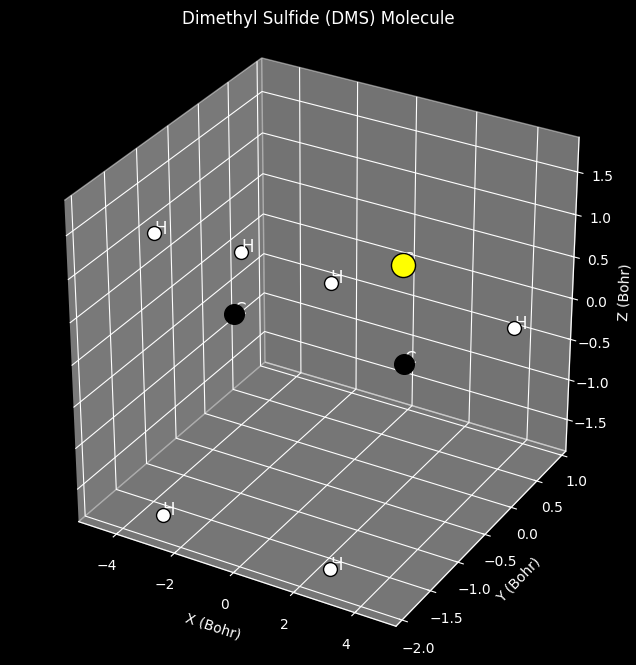

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyscf import gto
import numpy as np

# Your molecule definition
mol = gto.Mole()
mol.atom = '''
    S   0.00000000   0.46519300   0.00000000
    C  -1.50853500  -0.34759700   0.00000000
    H  -1.48831900  -1.00619800   0.87783900
    H  -1.48831900  -1.00619800  -0.87783900
    H  -2.45862400   0.18760200   0.00000000
    C   1.50853500  -0.34759700   0.00000000
    H   1.48831900  -1.00619800   0.87783900
    H   2.45862400   0.18760200   0.00000000
    H   1.48831900  -1.00619800  -0.87783900
'''
mol.build()

# Extract coordinates and atom types
coords = mol.atom_coords()
symbols = [mol.atom_symbol(i) for i in range(mol.natm)]

# Define colors and sizes for different atoms
atom_colors = {'H': 'white', 'C': 'black', 'S': 'yellow', 'O': 'red', 'N': 'blue'}
atom_sizes = {'H': 100, 'C': 200, 'S': 300, 'O': 200, 'N': 200}

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot atoms
for i, (coord, symbol) in enumerate(zip(coords, symbols)):
    color = atom_colors.get(symbol, 'gray')
    size = atom_sizes.get(symbol, 200)
    ax.scatter(coord[0], coord[1], coord[2],
               c=color, s=size, edgecolors='black', linewidth=1)
    # Add atom labels
    ax.text(coord[0], coord[1], coord[2], symbol, fontsize=12)

# Draw bonds (simple distance-based approach)
for i in range(mol.natm):
    for j in range(i+1, mol.natm):
        dist = np.linalg.norm(coords[i] - coords[j])
        # Typical bond lengths are < 1.8 Angstrom
        if dist < 1.8:
            ax.plot([coords[i][0], coords[j][0]],
                   [coords[i][1], coords[j][1]],
                   [coords[i][2], coords[j][2]], 'k-', linewidth=2)

# Set labels and title
ax.set_xlabel('X (Bohr)')
ax.set_ylabel('Y (Bohr)')
ax.set_zlabel('Z (Bohr)')
ax.set_title('Dimethyl Sulfide (DMS) Molecule')

# Make the plot look better
ax.grid(True)
ax.set_box_aspect([1,1,1])

plt.show()

In [36]:
import py3Dmol
from pyscf import gto

# Your molecule definition
mol = gto.Mole()
mol.atom = '''
    S   0.00000000   0.46519300   0.00000000
    C  -1.50853500  -0.34759700   0.00000000
    H  -1.48831900  -1.00619800   0.87783900
    H  -1.48831900  -1.00619800  -0.87783900
    H  -2.45862400   0.18760200   0.00000000
    C   1.50853500  -0.34759700   0.00000000
    H   1.48831900  -1.00619800   0.87783900
    H   2.45862400   0.18760200   0.00000000
    H   1.48831900  -1.00619800  -0.87783900
'''
mol.build()

# Convert coordinates from Bohr to Angstrom
bohr_to_ang = 0.529177249

# Create XYZ string with proper formatting
xyz_string = f"{mol.natm}\n\n"  # Note: two newlines after atom count
for i in range(mol.natm):
    coord = mol.atom_coord(i) * bohr_to_ang  # Convert to Angstrom
    xyz_string += f"{mol.atom_symbol(i)} {coord[0]:.6f} {coord[1]:.6f} {coord[2]:.6f}\n"

# Create viewer
view = py3Dmol.view(width=600, height=400)

# Add molecule
view.addModel(xyz_string, 'xyz')

# Apply styling
view.setStyle({'stick': {'radius': 0.15},
               'sphere': {'radius': 0.3}})

# Add labels for atoms
view.addPropertyLabels("atom", "", {'fontSize': 12, 'fontColor': 'black',
                                    'showBackground': True,
                                    'backgroundColor': 'white'})

# Set background and zoom
view.setBackgroundColor('white')
view.zoomTo()

# In Jupyter, the view object will display automatically
# If not displaying, you might need to explicitly call:
view  # This returns the IPython widget

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<font color="blue">**Dimethylsulfid DMS (CH₃)₂S**

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [13]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    S   0.00000000   0.46519300   0.00000000
    C  -1.50853500  -0.34759700   0.00000000
    H  -1.48831900  -1.00619800   0.87783900
    H  -1.48831900  -1.00619800  -0.87783900
    H  -2.45862400   0.18760200   0.00000000
    C   1.50853500  -0.34759700   0.00000000
    H   1.48831900  -1.00619800   0.87783900
    H   2.45862400   0.18760200   0.00000000
    H   1.48831900  -1.00619800  -0.87783900
'''

# Name
molecule = 'Dimethyl Sulfide (DMS) (CH₃)₂S'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # All 20 valence electrons are paired. It is a closed-shell singlet molecule
mol.build()

In [15]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Dimethyl Sulfide (DMS) (CH₃)₂S molecule symmetry:
 Top group: C2v
 Group name: C2v
--------------------


Point Group Symmetry
* **Shape:** Bent geometry at the sulfur atom, with the two methyl groups attached. The methyl groups themselves have local symmetry, but their orientation affects the overall molecule.
* **Symmetry Operations:** A two-fold rotation axis ($C_2$) that bisects the C-S-C angle. It has two vertical mirror planes ($\sigma_v$); one is the plane containing the C-S-C atoms, and the other is perpendicular to it.
* **Point Group:** **$C_{2v}$**

In [16]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -476.702530696431


np.float64(-476.70253069643064)

converged SCF energy = -476.702530696431


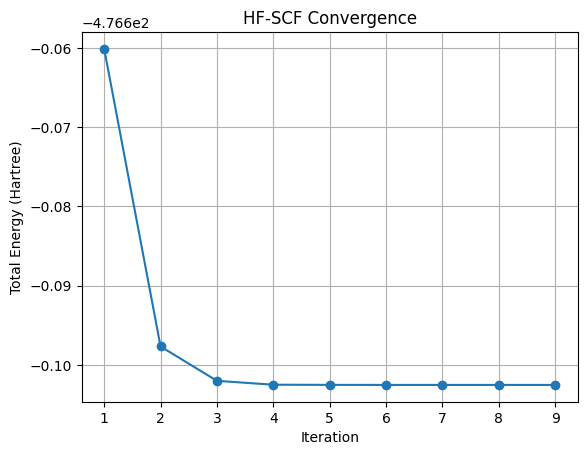

Ground state energy for Dimethyl Sulfide (DMS) (CH₃)₂S: -476.70253069643064 Hartree


In [17]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [18]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -477.977564068562


np.float64(-477.977564068562)

In [19]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -476.702530696429
E(MP2) = -477.146862733467  E_corr = -0.444332037037904
E(SCS-MP2) = -477.146398856379  E_corr = -0.443868159949699
MP2 energy: -0.444332037037904 Hartree


In [20]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -476.702530696431
E(CCSD) = -477.191694291306  E_corr = -0.4891635948749799
CCSD(T) correction = -0.0134882468760234


In [ ]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -40.1987085424813
Excited State energies (eV)
[12.72394509 12.72394509 12.72394509]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   B1     12.72395 eV     97.44 nm  f=0.3932
Excited State   2:   B2     12.72395 eV     97.44 nm  f=0.3932
Excited State   3:   B3     12.72395 eV     97.44 nm  f=0.3932


In [ ]:
# Geometry Optimization (in Angstroms) with HF or DFT
# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-517a255e-39b9-498f-919d-b1d788402c67.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.629118   0.629118   0.629118    0.000000  0.000000  0.000000
   H  -0.629118  -0.629118   0.629118    0.000000  0.000000  0.000000
   H  -0.629118   0.629118  -0.629118    0.000000  0.000000  0.000000
   H   0.629118  -0.629118  -0.629118    0.000000  0.000000  0.000000
converged SCF energy = -40.1987085424816
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000    -0.0000000000
1 H    -0.0004686254    -0.0004686254    -0.0004686254
2 H     0.0004686254     0.0004686254    -0.0004686254
3 H     0.0004686254    -0.0004686254     0.0004686254
4 H    -0.0004686254     0.0004686254     0.0004686254
----------------------------------------------
cycle 1: E = -40.1987085425  dE = -40.1987  norm(grad) = 0.0

Step    0 : Gradient = 7.260e-04/8.117e-04 (rms/max) Energy = -40.1987085425
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 3.48515e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000  -0.000000  -0.000000    0.000000 -0.000000 -0.000000
   H   0.629830   0.629830   0.629830    0.000712  0.000712  0.000712
   H  -0.629830  -0.629830   0.629830   -0.000712 -0.000712  0.000712
   H  -0.629830   0.629830  -0.629830   -0.000712  0.000712 -0.000712
   H   0.629830  -0.629830  -0.629830    0.000712 -0.000712 -0.000712
converged SCF energy = -40.1987119439091
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000    -0.0000000000    -0.0000000000
1 H     0.0000465180     0.0000465180     0.0000465180
2 H    -0.0000465180    -0.0000465180     0.0000465180
3 H    -0.0000465180     0.0000465180    -0.0000465180
4 H     0.0000465180    -0.0000465180    -0.0000465180
----------------------------------------------
cycle 2: E = -40.1987119439  dE = -3.40143e-06  norm(grad) =

Step    1 : Displace = 1.102e-03/1.232e-03 (rms/max) Trust = 1.000e-01 (=) Grad = 7.207e-05/8.057e-05 (rms/max) E (change) = -40.1987119439 (-3.401e-06) Quality = 0.900
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 3.83110e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000  -0.000000   0.000000   -0.000000  0.000000  0.000000
   H   0.629765   0.629765   0.629765   -0.000064 -0.000064 -0.000064
   H  -0.629765  -0.629765   0.629765    0.000064  0.000064 -0.000064
   H  -0.629765   0.629765  -0.629765    0.000064 -0.000064  0.000064
   H   0.629765  -0.629765  -0.629765   -0.000064  0.000064  0.000064
converged SCF energy = -40.1987119778076
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000    -0.0000000000     0.0000000000
1 H    -0.0000000272    -0.0000000272    -0.0000000272
2 H     0.0000000272     0.0000000272    -0.0000000272
3 H     0.0000000272    -0.0000000272     0.0000000272
4 H    -0.0000000272     0.0000000272     0.0000000272
----------------------------------------------
cycle 3: E = -40.1987119778  dE = -3.38985e-08  norm(grad) =

Step    2 : Displace = 9.954e-05/1.113e-04 (rms/max) Trust = 1.414e-01 (+) Grad = 4.206e-08/4.703e-08 (rms/max) E (change) = -40.1987119778 (-3.390e-08) Quality = 1.000
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 3.48515e-01 3.48515e-01 3.83110e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 1.908 seconds


[[ 1.06020538e-14 -6.97695238e-15  9.03489990e-14]
 [ 1.19008393e+00  1.19008393e+00  1.19008393e+00]
 [-1.19008393e+00 -1.19008393e+00  1.19008393e+00]
 [-1.19008393e+00  1.19008393e+00 -1.19008393e+00]
 [ 1.19008393e+00 -1.19008393e+00 -1.19008393e+00]]


converged SCF energy = -476.702530696428


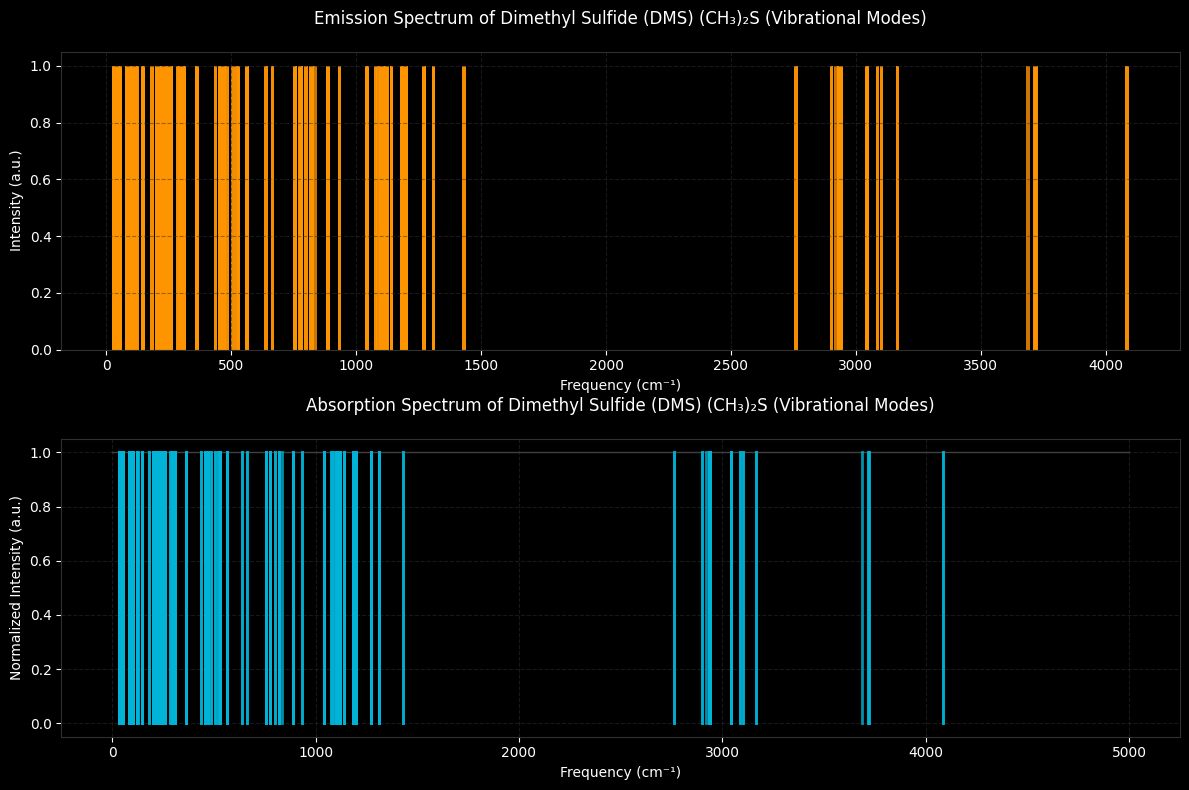

In [21]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()

<font color="blue">**Dimethyldisulfid DMDS (CH₃S)₂**

In [22]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    C  -1.579679   0.849405  -0.177006
    H  -1.516541   1.264210   0.829033
    H  -2.529898   0.315926  -0.297427
    H  -1.554032   1.528773  -1.031526
    S  -0.288210  -0.528464  -0.126027
    S   0.887210   0.334360   0.941620
    C   2.276901  -0.755146   0.505299
    H   2.331268  -1.526279   1.272183
    H   3.176472  -0.144865   0.413156
    H   2.199446  -1.196144  -0.487140
'''

# Name
molecule = 'Dimethyl Disulfide (DMDS) (CH₃S)₂'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # All 26 valence electrons are paired. It is a closed-shell singlet molecule.
mol.build()

In [24]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Dimethyl Disulfide (DMDS) (CH₃S)₂ molecule symmetry:
 Top group: C1
 Group name: C1
--------------------


Point Group Symmetry
* **Shape:** This molecule is not planar. It has a characteristic dihedral (gauche) angle between the two C-S-S planes, which is approximately 85-90 degrees.
* **Symmetry Operations:** The only symmetry element is a single two-fold rotation axis ($C_2$) that passes through the midpoint of the S-S bond and is perpendicular to it. There are no mirror planes or an inversion center.
* **Point Group:** **$C_2$**

In [25]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -874.219711781327


np.float64(-874.2197117813272)

converged SCF energy = -874.219711781327


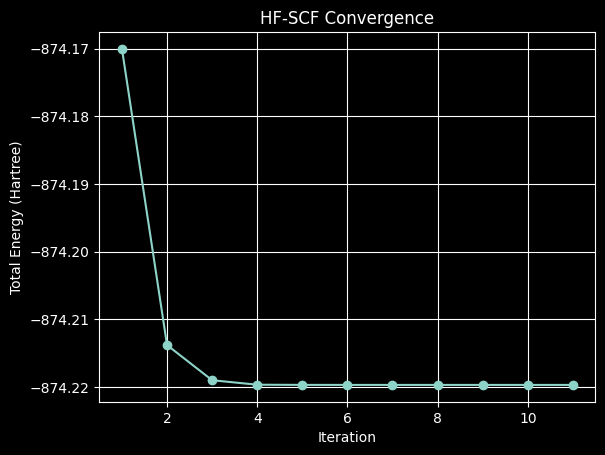

Ground state energy for Dimethyl Disulfide (DMDS) (CH₃S)₂: -874.2197117813267 Hartree


In [26]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [27]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -876.173524101238


np.float64(-876.1735241012376)

In [28]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -874.21971178133
E(MP2) = -874.798366176227  E_corr = -0.578654394896887
E(SCS-MP2) = -874.792216334056  E_corr = -0.57250455272571
MP2 energy: -0.5786543948968866 Hartree


In [29]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -874.219711781327
E(CCSD) = -874.8508958261147  E_corr = -0.631184044787465
CCSD(T) correction = -0.0190826561037912


In [30]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -874.219711781326
Excited State energies (eV)
[4.62561245 5.76872945 7.11715856]

** Singlet excitation energies and oscillator strengths **
Excited State   1:    A      4.62561 eV    268.04 nm  f=0.0003
Excited State   2:    A      5.76873 eV    214.92 nm  f=0.0042
Excited State   3:    A      7.11716 eV    174.20 nm  f=0.0004


In [31]:
# Geometry Optimization (in Angstroms) with HF or DFT
# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-33c610d1-cabc-40ff-b44e-59fe14ae9149.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.579679   0.849405  -0.177006    0.000000  0.000000  0.000000
   H  -1.516541   1.264210   0.829033    0.000000  0.000000  0.000000
   H  -2.529898   0.315926  -0.297427    0.000000  0.000000  0.000000
   H  -1.554032   1.528773  -1.031526    0.000000  0.000000  0.000000
   S  -0.288210  -0.528464  -0.126027    0.000000  0.000000  0.000000
   S   0.887210   0.334360   0.941620   -0.000000 -0.000000  0.000000
   C   2.276901  -0.755146   0.505299    0.000000  0.000000  0.000000
   H   2.331268  -1.526279   1.272183    0.000000  0.000000  0.000000
   H   3.176472  -0.144865   0.413156    0.000000  0.000000  0.000000
   H   2.199446  -1.196144  -0.487140    0.000000  0.000000  0.000000
converged SCF energy = -874.219711781341
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0094691842     0.03747

Step    0 : Gradient = 9.280e-02/2.136e-01 (rms/max) Energy = -874.2197117813
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 3.49395e-01 3.49555e-01 7.09331e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.674275   0.868509  -0.186157   -0.094596  0.019104 -0.009151
   H  -1.602275   1.327905   0.795956   -0.085734  0.063695 -0.033077
   H  -2.645489   0.375789  -0.281854   -0.115591  0.059863  0.015573
   H  -1.593432   1.531891  -1.045965   -0.039400  0.003118 -0.014439
   S  -0.424007  -0.520336  -0.160645   -0.135797  0.008128 -0.034618
   S   0.948075   0.280920   0.930344    0.060865 -0.053440 -0.011276
   C   2.378037  -0.783493   0.522735    0.101136 -0.028347  0.017436
   H   2.452569  -1.566931   1.272910    0.121301 -0.040652  0.000727
   H   3.272982  -0.161989   0.469991    0.096510 -0.017124  0.056835
   H   2.290751  -1.210489  -0.475151    0.091305 -0.014345  0.011989
converged SCF energy = -874.262736398971
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C    -0.0005181242     0.02340

Step    1 : Displace = 1.079e-01/1.404e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 4.482e-02/1.007e-01 (rms/max) E (change) = -874.2627363990 (-4.302e-02) Quality = 1.018
Hessian Eigenvalues: 2.28699e-02 2.30000e-02 2.30604e-02 ... 3.49447e-01 3.49541e-01 5.35257e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.627378   0.822852  -0.185994    0.046896 -0.045657  0.000164
   H  -1.579516   1.400338   0.732531    0.022759  0.072433 -0.063426
   H  -2.628558   0.409726  -0.296053    0.016931  0.033938 -0.014199
   H  -1.375808   1.415947  -1.061155    0.217624 -0.115945 -0.015190
   S  -0.531133  -0.625449  -0.045780   -0.107126 -0.105113  0.114865
   S   0.930410   0.241106   1.077867   -0.017665 -0.039814  0.147522
   C   2.341400  -0.748619   0.497846   -0.036636  0.034874 -0.024890
   H   2.511679  -1.589735   1.163159    0.059110 -0.022804 -0.109751
   H   3.205170  -0.086721   0.478545   -0.067812  0.075268  0.008554
   H   2.156671  -1.097669  -0.518800   -0.134080  0.112820 -0.043650
converged SCF energy = -874.279883135641
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0035886702     0.00837

Step    2 : Displace = 1.408e-01/2.469e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 1.209e-02/2.578e-02 (rms/max) E (change) = -874.2798831356 (-1.715e-02) Quality = 1.050
Hessian Eigenvalues: 2.20827e-02 2.30001e-02 2.33638e-02 ... 3.49432e-01 3.55813e-01 4.01947e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.609454   0.788160  -0.197731    0.017925 -0.034692 -0.011737
   H  -1.584949   1.511056   0.613931   -0.005433  0.110718 -0.118600
   H  -2.644014   0.493729  -0.366093   -0.015456  0.084003 -0.070040
   H  -1.192225   1.242539  -1.093737    0.183583 -0.173407 -0.032583
   S  -0.686403  -0.715484   0.254819   -0.155270 -0.090035  0.300598
   S   0.936106   0.138431   1.266716    0.005696 -0.102675  0.188850
   C   2.334132  -0.713140   0.460905   -0.007268  0.035479 -0.036940
   H   2.574136  -1.640282   0.976925    0.062456 -0.050547 -0.186234
   H   3.193098  -0.045061   0.502778   -0.012072  0.041660  0.024233
   H   2.082509  -0.918172  -0.576348   -0.074162  0.179497 -0.057548
converged SCF energy = -874.28618866292
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C    -0.0026375022    -0.002878

Step    3 : Displace = 1.899e-01/3.429e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 3.046e-03/6.619e-03 (rms/max) E (change) = -874.2861886629 (-6.306e-03) Quality = 1.469
Hessian Eigenvalues: 7.89577e-03 2.30228e-02 2.36844e-02 ... 3.49435e-01 3.58694e-01 5.01102e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.499995   0.727463  -0.205309    0.109458 -0.060697 -0.007578
   H  -1.435409   1.600475   0.441499    0.149540  0.089419 -0.172432
   H  -2.548587   0.534264  -0.430195    0.095427  0.040535 -0.064103
   H  -0.947280   0.931946  -1.121610    0.244945 -0.310593 -0.027873
   S  -0.857040  -0.748074   0.641814   -0.170637 -0.032590  0.386995
   S   0.934827  -0.002966   1.517479   -0.001280 -0.141396  0.250763
   C   2.239608  -0.639402   0.408173   -0.094524  0.073738 -0.052732
   H   2.509427  -1.660132   0.674954   -0.064709 -0.019850 -0.301971
   H   3.114238  -0.000517   0.535353   -0.078860  0.044544  0.032576
   H   1.893149  -0.601281  -0.619992   -0.189361  0.316891 -0.043644
converged SCF energy = -874.289982104788
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C    -0.0038851443    -0.00520

Step    4 : Displace = 2.773e-01/4.095e-01 (rms/max) Trust = 2.828e-01 (+) Grad = 7.424e-03/1.633e-02 (rms/max) E (change) = -874.2899821048 (-3.793e-03) Quality = 0.926
Hessian Eigenvalues: 1.00789e-02 2.30331e-02 2.43949e-02 ... 3.49561e-01 3.59196e-01 5.92876e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.404504   0.676135  -0.202187    0.095491 -0.051327  0.003122
   H  -1.310820   1.628595   0.314992    0.124589  0.028120 -0.126507
   H  -2.450294   0.510564  -0.464414    0.098293 -0.023700 -0.034219
   H  -0.799200   0.692144  -1.107418    0.148079 -0.239802  0.014193
   S  -0.922926  -0.692163   0.898690   -0.065886  0.055911  0.256876
   S   0.959160  -0.055907   1.652956    0.024333 -0.052942  0.135476
   C   2.147045  -0.585388   0.369755   -0.092563  0.054014 -0.038418
   H   2.352150  -1.651500   0.448842   -0.157277  0.008631 -0.226112
   H   3.067608  -0.029203   0.550565   -0.046630 -0.028686  0.015212
   H   1.764719  -0.351500  -0.619615   -0.128430  0.249781  0.000377
converged SCF energy = -874.29123250022
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C    -0.0027618844    -0.002763

Step    5 : Displace = 1.991e-01/2.982e-01 (rms/max) Trust = 3.000e-01 (+) Grad = 7.167e-03/1.561e-02 (rms/max) E (change) = -874.2912325002 (-1.250e-03) Quality = 1.091
Hessian Eigenvalues: 1.05055e-02 2.30403e-02 3.28326e-02 ... 3.49451e-01 3.53348e-01 4.61690e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.388961   0.669749  -0.192032    0.015543 -0.006387  0.010155
   H  -1.345222   1.633933   0.309148   -0.034401  0.005339 -0.005844
   H  -2.419857   0.448935  -0.472602    0.030437 -0.061629 -0.008187
   H  -0.771318   0.673220  -1.088261    0.027883 -0.018924  0.019156
   S  -0.891658  -0.656054   0.953390    0.031268  0.036109  0.054700
   S   0.976617   0.011232   1.638895    0.017458  0.067140 -0.014061
   C   2.127840  -0.584360   0.356383   -0.019204  0.001028 -0.013372
   H   2.267245  -1.660852   0.429728   -0.084905 -0.009351 -0.019114
   H   3.073555  -0.075393   0.544811    0.005946 -0.046190 -0.005754
   H   1.774695  -0.318635  -0.637295    0.009976  0.032866 -0.017680
converged SCF energy = -874.29242054792
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0001493566     0.000755

Step    6 : Displace = 5.171e-02/8.871e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 4.006e-03/8.828e-03 (rms/max) E (change) = -874.2924205479 (-1.188e-03) Quality = 1.520
Hessian Eigenvalues: 8.11149e-03 2.26695e-02 2.52652e-02 ... 3.49381e-01 3.50492e-01 4.10831e-01



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.386314   0.658200  -0.175973    0.002647 -0.011549  0.016060
   H  -1.415199   1.636137   0.296979   -0.069977  0.002204 -0.012169
   H  -2.393652   0.362370  -0.473811    0.026205 -0.086566 -0.001209
   H  -0.747835   0.669585  -1.056849    0.023483 -0.003635  0.031413
   S  -0.836960  -0.601203   1.018171    0.054698  0.054851  0.064781
   S   1.008319   0.120171   1.597213    0.031701  0.108939 -0.041682
   C   2.115155  -0.583738   0.338709   -0.012686  0.000622 -0.017674
   H   2.144510  -1.667959   0.414735   -0.122735 -0.007107 -0.014993
   H   3.102547  -0.168658   0.545928    0.028993 -0.093266  0.001117
   H   1.812366  -0.283128  -0.662938    0.037671  0.035507 -0.025643
converged SCF energy = -874.293041701103
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0017346877     0.00261

Step    7 : Displace = 7.817e-02/1.240e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 1.675e-03/3.152e-03 (rms/max) E (change) = -874.2930417011 (-6.212e-04) Quality = 1.006
Hessian Eigenvalues: 7.29535e-03 2.17250e-02 2.46357e-02 ... 3.49480e-01 3.50416e-01 4.63254e-01



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.394755   0.656508  -0.174291   -0.008441 -0.001692  0.001682
   H  -1.428761   1.638918   0.290538   -0.013563  0.002781 -0.006442
   H  -2.400760   0.355360  -0.469706   -0.007107 -0.007009  0.004105
   H  -0.755202   0.671546  -1.054605   -0.007367  0.001961  0.002244
   S  -0.833083  -0.591806   1.024864    0.003877  0.009397  0.006693
   S   1.016453   0.134934   1.589645    0.008134  0.014763 -0.007568
   C   2.121764  -0.584425   0.337004    0.006610 -0.000687 -0.001704
   H   2.130383  -1.669398   0.411452   -0.014127 -0.001439 -0.003283
   H   3.116467  -0.192368   0.553102    0.013920 -0.023710  0.007174
   H   1.830431  -0.277493  -0.665838    0.018065  0.005635 -0.002900
converged SCF energy = -874.293123430011
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0006767806     0.00094

Step    8 : Displace = 1.505e-02/2.830e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.001e-03/1.946e-03 (rms/max) E (change) = -874.2931234300 (-8.173e-05) Quality = 1.593
Hessian Eigenvalues: 5.02751e-03 1.92283e-02 2.45626e-02 ... 3.49347e-01 3.51477e-01 3.90688e-01



Geometry optimization cycle 10
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.407227   0.652645  -0.169892   -0.012471 -0.003863  0.004399
   H  -1.454437   1.644262   0.275187   -0.025676  0.005343 -0.015351
   H  -2.409527   0.334971  -0.459432   -0.008767 -0.020390  0.010274
   H  -0.767139   0.667744  -1.050133   -0.011937 -0.003801  0.004472
   S  -0.823860  -0.567069   1.047364    0.009223  0.024737  0.022500
   S   1.036544   0.170337   1.573566    0.020090  0.035403 -0.016078
   C   2.130813  -0.585932   0.331321    0.009049 -0.001507 -0.005683
   H   2.088416  -1.671042   0.396253   -0.041967 -0.001644 -0.015200
   H   3.139280  -0.246415   0.570778    0.022813 -0.054047  0.017676
   H   1.870075  -0.257725  -0.672847    0.039644  0.019769 -0.007009
converged SCF energy = -874.293189863046
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C    -0.0003261907    -0.0007

Step    9 : Displace = 3.457e-02/6.130e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 5.698e-04/9.945e-04 (rms/max) E (change) = -874.2931898630 (-6.643e-05) Quality = 1.121
Hessian Eigenvalues: 4.48680e-03 1.82978e-02 2.45991e-02 ... 3.49372e-01 3.51653e-01 4.05561e-01



Geometry optimization cycle 11
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.409845   0.652824  -0.169170   -0.002618  0.000179  0.000722
   H  -1.458679   1.645022   0.274186   -0.004241  0.000761 -0.001001
   H  -2.411927   0.331960  -0.456274   -0.002400 -0.003011  0.003158
   H  -0.771475   0.666359  -1.050609   -0.004336 -0.001385 -0.000476
   S  -0.822280  -0.563020   1.050117    0.001581  0.004049  0.002753
   S   1.040525   0.178275   1.568890    0.003981  0.007938 -0.004676
   C   2.133004  -0.586748   0.330440    0.002191 -0.000816 -0.000882
   H   2.079055  -1.671325   0.393555   -0.009361 -0.000283 -0.002698
   H   3.143558  -0.257540   0.575558    0.004279 -0.011125  0.004780
   H   1.881000  -0.254032  -0.674528    0.010925  0.003693 -0.001680
converged SCF energy = -874.293196312104
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C    -0.0002003697    -0.0005

Step   10 : Displace = 7.536e-03/1.315e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 2.898e-04/5.587e-04 (rms/max) E (change) = -874.2931963121 (-6.449e-06) Quality = 1.371
Hessian Eigenvalues: 4.10465e-03 1.69053e-02 2.48767e-02 ... 3.49218e-01 3.49441e-01 3.97373e-01



Geometry optimization cycle 12
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.409805   0.652576  -0.169012    0.000040 -0.000248  0.000158
   H  -1.457594   1.645097   0.273275    0.001085  0.000075 -0.000911
   H  -2.412460   0.331363  -0.454105   -0.000533 -0.000597  0.002169
   H  -0.772963   0.662685  -1.051480   -0.001488 -0.003674 -0.000871
   S  -0.821759  -0.561547   1.052302    0.000520  0.001473  0.002185
   S   1.042309   0.181435   1.568045    0.001784  0.003160 -0.000845
   C   2.132772  -0.586532   0.329912   -0.000232  0.000216 -0.000528
   H   2.072232  -1.670830   0.389882   -0.006823  0.000495 -0.003673
   H   3.144466  -0.263186   0.578237    0.000908 -0.005646  0.002679
   H   1.885739  -0.249286  -0.674891    0.004739  0.004746 -0.000363
converged SCF energy = -874.293198211582
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C    -0.0000208898    -0.0000

Step   11 : Displace = 4.289e-03/7.609e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 3.396e-05/5.726e-05 (rms/max) E (change) = -874.2931982116 (-1.899e-06) Quality = 1.115
Hessian Eigenvalues: 4.38944e-03 1.46148e-02 2.37565e-02 ... 3.49341e-01 3.49483e-01 3.85649e-01



Geometry optimization cycle 13
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.409580   0.652574  -0.169199    0.000225 -0.000002 -0.000187
   H  -1.455653   1.644956   0.273515    0.001941 -0.000141  0.000240
   H  -2.412922   0.332598  -0.453287   -0.000462  0.001236  0.000818
   H  -0.773634   0.661798  -1.052306   -0.000671 -0.000888 -0.000825
   S  -0.821965  -0.562510   1.051442   -0.000206 -0.000963 -0.000859
   S   1.041757   0.180782   1.568300   -0.000552 -0.000653  0.000255
   C   2.132637  -0.586328   0.330102   -0.000135  0.000204  0.000190
   H   2.072030  -1.670650   0.389345   -0.000201  0.000180 -0.000537
   H   3.144263  -0.263045   0.578842   -0.000203  0.000141  0.000605
   H   1.886003  -0.248399  -0.674590    0.000264  0.000887  0.000301
converged SCF energy = -874.293198418569
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000142429     0.0000

Step   12 : Displace = 1.065e-03/1.931e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 3.392e-05/6.763e-05 (rms/max) E (change) = -874.2931984186 (-2.070e-07) Quality = 1.478
Hessian Eigenvalues: 4.39830e-03 6.78521e-03 2.19045e-02 ... 3.49337e-01 3.49552e-01 4.09918e-01



Geometry optimization cycle 14
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.409150   0.652346  -0.169461    0.000430 -0.000228 -0.000262
   H  -1.452349   1.644888   0.273149    0.003304 -0.000067 -0.000366
   H  -2.413633   0.334452  -0.451836   -0.000711  0.001854  0.001451
   H  -0.774567   0.659870  -1.053560   -0.000933 -0.001927 -0.001255
   S  -0.822277  -0.563563   1.050761   -0.000312 -0.001053 -0.000681
   S   1.041045   0.179555   1.569106   -0.000712 -0.001227  0.000806
   C   2.132301  -0.585890   0.330278   -0.000337  0.000438  0.000176
   H   2.071303  -1.670285   0.387748   -0.000727  0.000365 -0.001597
   H   3.143913  -0.263321   0.580010   -0.000350 -0.000276  0.001168
   H   1.886349  -0.246277  -0.674030    0.000346  0.002122  0.000560
converged SCF energy = -874.293198594596
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000230040     0.0000

Step   13 : Displace = 1.877e-03/3.332e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 3.945e-05/7.071e-05 (rms/max) E (change) = -874.2931985946 (-1.760e-07) Quality = 1.358
Hessian Eigenvalues: 4.19241e-03 4.58707e-03 2.20305e-02 ... 3.49276e-01 3.49509e-01 4.42548e-01



Geometry optimization cycle 15
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.409121   0.652266  -0.169626    0.000029 -0.000079 -0.000165
   H  -1.450371   1.644973   0.272832    0.001978  0.000085 -0.000317
   H  -2.414406   0.335788  -0.450700   -0.000774  0.001336  0.001136
   H  -0.775603   0.658852  -1.054512   -0.001037 -0.001018 -0.000952
   S  -0.822482  -0.564210   1.050112   -0.000205 -0.000647 -0.000649
   S   1.040563   0.178659   1.569466   -0.000483 -0.000896  0.000360
   C   2.132358  -0.585704   0.330427    0.000057  0.000186  0.000148
   H   2.071150  -1.670149   0.386814   -0.000154  0.000135 -0.000934
   H   3.143909  -0.263618   0.581013   -0.000004 -0.000297  0.001004
   H   1.886941  -0.245081  -0.673661    0.000592  0.001196  0.000368
converged SCF energy = -874.29319865718
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000112500     0.00003

Step   14 : Displace = 1.246e-03/2.150e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 1.997e-05/3.590e-05 (rms/max) E (change) = -874.2931986572 (-6.258e-08) Quality = 1.238
Hessian Eigenvalues: 4.28248e-03 4.65260e-03 2.19903e-02 ... 3.49376e-01 3.49554e-01 3.96738e-01



Geometry optimization cycle 16
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -1.409206   0.652241  -0.169637   -0.000085 -0.000025 -0.000011
   H  -1.450141   1.645062   0.272612    0.000229  0.000089 -0.000220
   H  -2.414636   0.335948  -0.450399   -0.000229  0.000160  0.000301
   H  -0.775919   0.658615  -1.054697   -0.000315 -0.000237 -0.000185
   S  -0.822492  -0.564118   1.050145   -0.000009  0.000092  0.000033
   S   1.040569   0.178586   1.569471    0.000006 -0.000073  0.000005
   C   2.132449  -0.585703   0.330421    0.000092  0.000001 -0.000005
   H   2.070998  -1.670155   0.386515   -0.000152 -0.000005 -0.000299
   H   3.144015  -0.263940   0.581352    0.000107 -0.000322  0.000339
   H   1.887299  -0.244762  -0.673618    0.000358  0.000319  0.000043
converged SCF energy = -874.29319866801
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000019023     0.00000

Step   15 : Displace = 3.237e-04/5.057e-04 (rms/max) Trust = 3.000e-01 (=) Grad = 4.224e-06/7.800e-06 (rms/max) E (change) = -874.2931986680 (-1.083e-08) Quality = 1.277
Hessian Eigenvalues: 4.28248e-03 4.65260e-03 2.19903e-02 ... 3.49376e-01 3.49554e-01 3.96738e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 275.129 seconds


[[-2.66301343  1.23255743 -0.32056695]
 [-2.74037018  3.10871659  0.51516211]
 [-4.5630002   0.63485031 -0.85113045]
 [-1.46627364  1.24460272 -1.99308859]
 [-1.55428405 -1.06602769  1.98448625]
 [ 1.96638988  0.33747895  2.96586986]
 [ 4.02974541 -1.10681828  0.62440593]
 [ 3.91361939 -3.15613466  0.73040711]
 [ 5.94132747 -0.49877474  1.09859586]
 [ 3.56647828 -0.46253281 -1.2729538 ]]


converged SCF energy = -874.219711781327


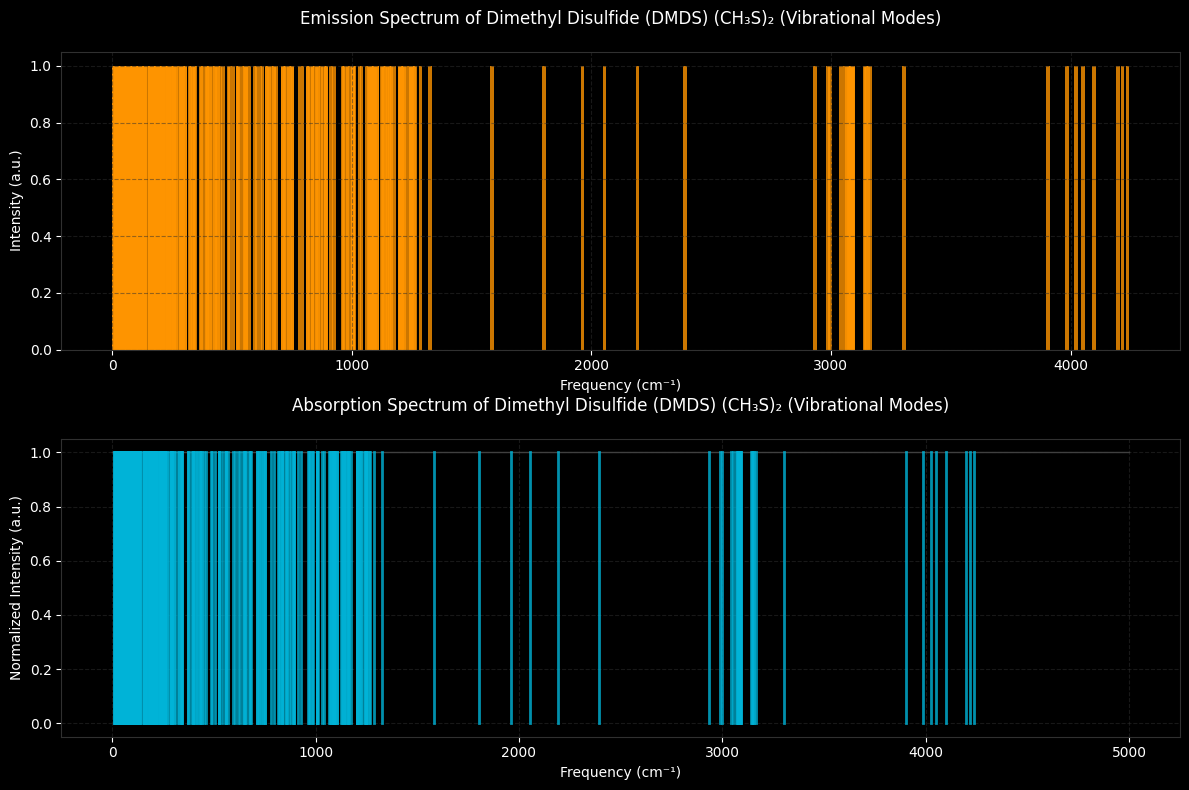

In [32]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()